In [ ]:
!pip install pandas openpyxl numpy matplotlib seaborn xgboost scikit-learn sentence-transformers

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [71]:
df = pd.read_csv('start-up-list.csv')

# Data Explore

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Organization Name                     1116 non-null   object 
 1   Organization Name URL                 1116 non-null   object 
 2   Estimated Revenue Range               1047 non-null   object 
 3   Industries                            1115 non-null   object 
 4   Headquarters Location                 1116 non-null   object 
 5   Description                           1116 non-null   object 
 6   CB Rank (Company)                     1116 non-null   int64  
 7   Founded Date                          1115 non-null   object 
 8   Founded Date Precision                1115 non-null   object 
 9   Number of Employees                   1116 non-null   object 
 10  Last Funding Type                     1116 non-null   object 
 11  IPO Status       

In [73]:
df.describe()

,CB Rank (Company),Last Funding Amount,Last Funding Amount (in USD),Total Funding Amount,Total Funding Amount (in USD),Number of Funding Rounds,Last Equity Funding Amount,Last Equity Funding Amount (in USD),Total Equity Funding Amount,Total Equity Funding Amount (in USD),Number of Investors,Number of Lead Investors,Number of Founders
count,1.116000e+03,1.011000e+03,1.011000e+03,1.107000e+03,1.107000e+03,1116.000000,1.045000e+03,1.045000e+03,1.107000e+03,1.107000e+03,1111.000000,1103.000000,1106.000000
mean,1.692436e+04,6.876931e+09,1.212656e+08,7.982525e+08,3.285874e+08,6.436380,8.635513e+09,1.282491e+08,7.581525e+08,2.875676e+08,16.945995,4.857661,2.486438
std,1.184759e+05,1.283614e+11,2.307315e+08,1.552401e+10,7.694941e+08,2.898041,1.413365e+11,2.938066e+08,1.551723e+10,5.857768e+08,11.624251,2.342043,1.160549
min,2.000000e+00,7.000000e+04,7.000000e+04,1.500000e+05,1.500000e+05,1.000000,7.000000e+04,7.000000e+04,1.500000e+05,1.500000e+05,1.000000,1.000000,1.000000
25%,1.814750e+03,4.500000e+07,4.500000e+07,1.050000e+08,1.047969e+08,4.000000,4.600000e+07,4.500000e+07,1.016500e+08,1.002443e+08,9.000000,3.000000,2.000000
50%,4.351500e+03,7.600000e+07,7.500000e+07,1.802000e+08,1.800000e+08,6.000000,8.000000e+07,7.815000e+07,1.715000e+08,1.708920e+08,15.000000,5.000000,2.000000
75%,8.217750e+03,1.400000e+08,1.350000e+08,3.558650e+08,3.545000e+08,8.000000,1.500000e+08,1.400000e+08,3.303100e+08,3.280000e+08,21.000000,6.000000,3.000000
max,3.372174e+06,3.600000e+12,5.600000e+09,5.162000e+11,1.724388e+10,23.000000,3.600000e+12,6.500000e+09,5.162000e+11,1.110000e+10,99.000000,20.000000,8.000000


In [74]:
df.head()

,Organization Name,Organization Name URL,Estimated Revenue Range,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Number of Employees,...,Total Equity Funding Amount,Total Equity Funding Amount Currency,Total Equity Funding Amount (in USD),Top 5 Investors,Number of Investors,Number of Lead Investors,Website,Founders,Number of Founders,Region
0,Igloo,https://www.crunchbase.com/organization/axinan,$10M to $50M,"Artificial Intelligence (AI), Financial Servic...","Singapore, Central Region, Singapore",Igloo is an insurtech firm that creates insura...,3524,1-Jun-16,month,101-250,...,98000000.0,USD,98000000.0,"Cathay Innovation, Finnfund, Partech, Eurazeo,...",13.0,4.0,https://www.iglooinsure.com,"Raunak Mehta, Wei Zhu",2.0,ASIAN
1,Sky Mavis,https://www.crunchbase.com/organization/sky-mavis,$1B to $10B,"Blockchain, Information Technology, Video Games","Singapore, Central Region, Singapore",Sky Mavis is a technology company that creates...,6699,24-Apr-19,day,101-250,...,311000000.0,USD,311000000.0,"Andreessen Horowitz, Accel, Paradigm, 500 Glob...",36.0,4.0,https://www.Skymavis.com,"Aleksander Leonard Larsen, Jeffrey Zirlin",2.0,ASIAN
2,Super,https://www.crunchbase.com/organization/super-...,$1M to $10M,"Apps, Consumer, E-Commerce","Surabaya, Jawa Timur, Indonesia",Super is a social commerce platform that enabl...,95241,5-Apr-18,day,101-250,...,105000000.0,USD,105000000.0,"B Capital, Y Combinator, New Enterprise Associ...",15.0,3.0,https://superapp.id,"Debeasinta Budiman, Steven Wongsoredjo",2.0,ASIAN
3,PrivyID,https://www.crunchbase.com/organization/privyid,$50M to $100M,"Identity Management, Information Technology","Jakarta, Jakarta Raya, Indonesia",PrivyID is building an unprecedented business ...,101474,1-Jan-15,year,101-250,...,71610000.0,USD,71610000.0,"Endeavor Catalyst, Bossa Invest, MDI Ventures,...",13.0,6.0,https://privy.id/,"Guritno Adi Saputra, Marshall Pribadi",2.0,ASIAN
4,ElevenLabs,https://www.crunchbase.com/organization/eleven...,$10M to $50M,"Artificial Intelligence (AI), Content Creators...","New York, New York, United States",ElevenLabs develops AI audio models for speech...,27,17-Apr-22,day,101-250,...,281000000.0,USD,281000000.0,"Andreessen Horowitz, Sequoia Capital, Valor Eq...",39.0,6.0,http://elevenlabs.io,"Mati Staniszewski, Piotr Dabkowski",2.0,US


In [75]:
df.columns

Index(['Organization Name', 'Organization Name URL', 'Estimated Revenue Range',
       'Industries', 'Headquarters Location', 'Description',
       'CB Rank (Company)', 'Founded Date', 'Founded Date Precision',
       'Number of Employees', 'Last Funding Type', 'IPO Status',
       'Funding Status', 'Last Funding Date', 'Last Funding Amount',
       'Last Funding Amount Currency', 'Last Funding Amount (in USD)',
       'Total Funding Amount', 'Total Funding Amount Currency',
       'Total Funding Amount (in USD)', 'Last Equity Funding Type',
       'Number of Funding Rounds', 'Last Equity Funding Amount',
       'Last Equity Funding Amount Currency',
       'Last Equity Funding Amount (in USD)', 'Total Equity Funding Amount',
       'Total Equity Funding Amount Currency',
       'Total Equity Funding Amount (in USD)', 'Top 5 Investors',
       'Number of Investors', 'Number of Lead Investors', 'Website',
       'Founders', 'Number of Founders', 'Region'],
      dtype='object')

# Data Cleaning

## Remove Duplicates and Irrelevant Observation

In [76]:
columns_to_drop = [
    'Organization Name URL', 'Website', 'Description', 'Founders',
    'Number of Founders', 'Founded Date Precision','Last Funding Amount',
    'Last Funding Amount Currency', 'Total Funding Amount', 'Total Funding Amount Currency',
    'Last Equity Funding Amount', 'Last Equity Funding Amount Currency','Total Equity Funding Amount',
    'Total Equity Funding Amount Currency',
]
df = df.drop(columns=columns_to_drop)

print(df.columns)
print(df.shape)

Index(['Organization Name', 'Estimated Revenue Range', 'Industries',
       'Headquarters Location', 'CB Rank (Company)', 'Founded Date',
       'Number of Employees', 'Last Funding Type', 'IPO Status',
       'Funding Status', 'Last Funding Date', 'Last Funding Amount (in USD)',
       'Total Funding Amount (in USD)', 'Last Equity Funding Type',
       'Number of Funding Rounds', 'Last Equity Funding Amount (in USD)',
       'Total Equity Funding Amount (in USD)', 'Top 5 Investors',
       'Number of Investors', 'Number of Lead Investors', 'Region'],
      dtype='object')
(1116, 21)


In [77]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Organization Name, Estimated Revenue Range, Industries, Headquarters Location, CB Rank (Company), Founded Date, Number of Employees, Last Funding Type, IPO Status, Funding Status, Last Funding Date, Last Funding Amount (in USD), Total Funding Amount (in USD), Last Equity Funding Type, Number of Funding Rounds, Last Equity Funding Amount (in USD), Total Equity Funding Amount (in USD), Top 5 Investors, Number of Investors, Number of Lead Investors, Region]
Index: []

[0 rows x 21 columns]


## Check Missing Value

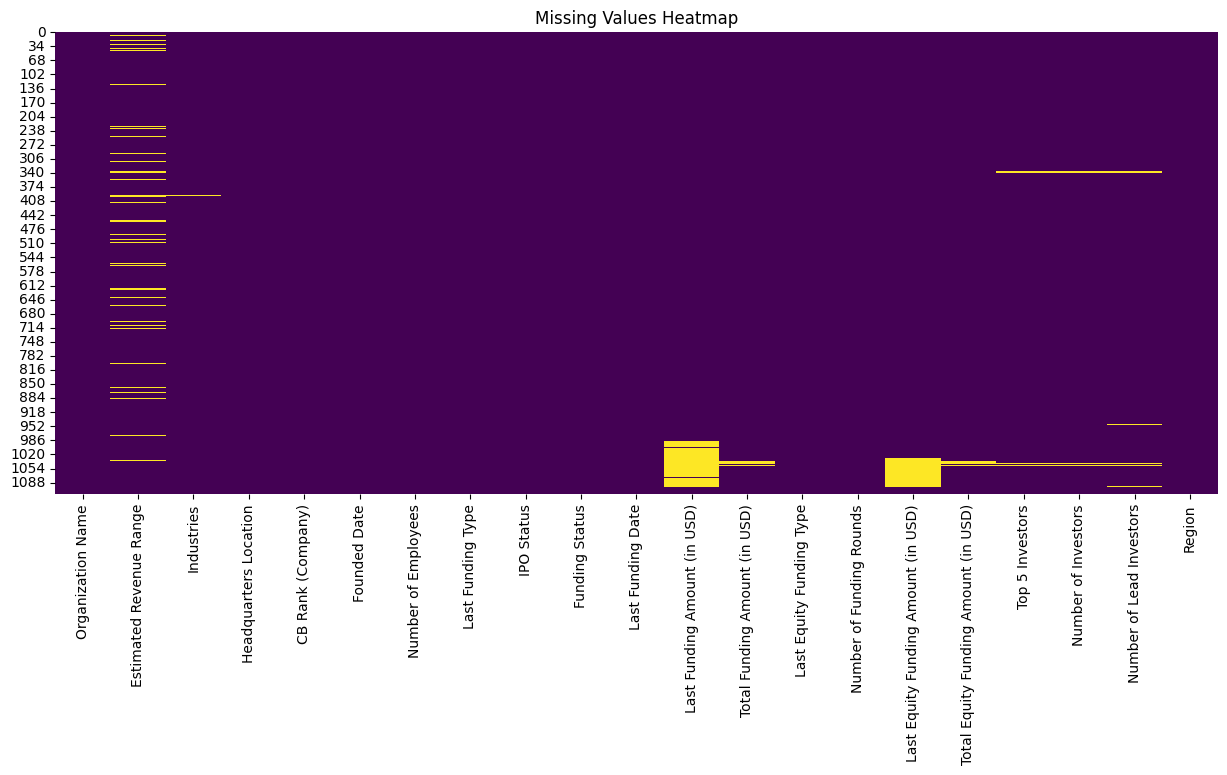

In [78]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [79]:
null_count = df.isnull().sum()
null_percent = (df.isnull().sum() / len(df)) * 100

# Combine into one DataFrame for display
null_summary = pd.DataFrame({
    'Null Count': null_count,
    'Null %': null_percent.round(2)
})
null_summary

,Null Count,Null %
Organization Name,0,0.00
Estimated Revenue Range,69,6.18
Industries,1,0.09
Headquarters Location,0,0.00
CB Rank (Company),0,0.00
Founded Date,1,0.09
Number of Employees,0,0.00
Last Funding Type,0,0.00
IPO Status,0,0.00
Funding Status,0,0.00


## Transform data 

In [80]:
def convert_revenue_range(value):
    """
    Converts revenue range strings to numerical midpoints (in USD).
    """
    if pd.isna(value):
        return np.nan

    s = str(value).strip()

    if s == 'Less than $1M':
        return 0.5e6  # Assuming midpoint of 0 to 1M is 0.5M
    elif s == '$1M to $10M':
        return 5.5e6  # Midpoint of 1M to 10M
    elif s == '$10M to $50M':
        return 30e6   # Midpoint of 10M to 50M
    elif s == '$50M to $100M':
        return 75e6  # Midpoint of 50M to 100M
    elif s == '$100M to $500M':
        return 300e6  # Midpoint of 100M to 500M
    elif s == '$500M to $1B':
        return 750e6  # Midpoint of 500M to 1B
    elif s == '$1B to $10B':
        return 5.5e9  # Midpoint of 1B to 10B
    else:
        return np.nan
    
df['Estimated Revenue Range Midpoint'] = df['Estimated Revenue Range'].apply(convert_revenue_range)
df['log_Revenue_Midpoint'] = np.log1p(df['Estimated Revenue Range Midpoint'])

In [81]:
# Tranform Founded Data o Founded Year
df['Founded Date'] = pd.to_datetime(df['Founded Date'], errors='coerce')
df['Founded Year'] = df['Founded Date'].dt.year
df['Founded Year']

C:\Users\binh.nguyen\AppData\Local\Temp\ipykernel_25648\389125870.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Founded Date'] = pd.to_datetime(df['Founded Date'], errors='coerce')


0       2016.0
1       2019.0
2       2018.0
3       2015.0
4       2022.0
         ...  
1111    2004.0
1112    2013.0
1113    2016.0
1114    2016.0
1115    2011.0
Name: Founded Year, Length: 1116, dtype: float64

In [83]:
# Location standardization
df[['City', 'Country']] = df['Headquarters Location'].str.extract(r'^([^,]+),.*,\s*([^,]+)$')
df[["Country", "City"]]

,Country,City
0,Singapore,Singapore
1,Singapore,Singapore
2,Indonesia,Surabaya
3,Indonesia,Jakarta
4,United States,New York
...,...,...
1111,Singapore,Singapore
1112,United States,Redwood City
1113,United States,San Antonio
1114,United States,Acworth


In [85]:
def employees_range_to_midpoint(value):
    """
    Converts employee range strings to numerical midpoints.
    Example: '101-250' -> 175.5
    """
    if pd.isna(value):
        return np.nan

    s = str(value).strip()
    if '-' in s:
        parts = s.split('-')
        try:
            low = int(parts[0])
            high = int(parts[1])
            return (low + high) / 2
        except ValueError:
            return np.nan
    elif s == '10001+':
        return 10001  # or some other logic for open-ended
    else:
        return np.nan

df['Number of Employees Midpoint'] = df['Number of Employees'].apply(employees_range_to_midpoint)
df['Number of Employees Midpoint']

0       175.5
1       175.5
2       175.5
3       175.5
4       175.5
        ...  
1111     75.5
1112    750.5
1113     75.5
1114    375.5
1115     30.5
Name: Number of Employees Midpoint, Length: 1116, dtype: float64

### Dupicate  or Semantically Industry labels
During data exploration, we found that manay industry labels had similar meanings. To address probelm, we used machine learning techniques to standardize, making data more consistency and enabling easier analysis downstream.

In [91]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [92]:
def clean_industry_text(text):
    """Standardizes industry text for better embedding."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\s*\([^)]*\)', '', text)

    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()


all_industries = set()
for industries_str in df['Industries'].dropna():
    industries_list = [clean_industry_text(i.strip()) for i in industries_str.split(',')]
    all_industries.update(industries_list)


all_industries.discard('')
unique_industries = sorted(list(all_industries))

print(f"\nFound {len(unique_industries)} unique, cleaned industries.")

NameError: name 're' is not defined

## Handle missing data

### Subtask:
Apply machine learning techniques to impute or handle the missing values in the 'Estimiated Revenue Range', 'Last Funding Amount', 'Last Equity Funding Amount', 'Total Funding Amount', and 'Total Equity Funding Amount' columns.


In [86]:
# Drop rows with all  'Last Funding Amount (in USD)', 'Total Funding Amount (in USD)','Last Equity Funding Amount (in USD)', 'Total Equity Funding Amount (in USD)'
# Because if these columns are all NaN, it means the company has no funding information available. Not trust data in these columns.
cols_to_check = ['Last Funding Amount (in USD)',
                 'Total Funding Amount (in USD)',
                 'Last Equity Funding Amount (in USD)',
                 'Total Equity Funding Amount (in USD)'
                ]
# remove miss value
df.dropna(subset=cols_to_check, how='all', inplace=True)


In [87]:
null_count = df.isnull().sum()
null_percent = (df.isnull().sum() / len(df)) * 100

# Combine into one DataFrame for display
null_summary = pd.DataFrame({
    'Null Count': null_count,
    'Null %': null_percent.round(2)
})
null_summary

,Null Count,Null %
Organization Name,0,0.00
Estimated Revenue Range,69,6.23
Industries,1,0.09
Headquarters Location,0,0.00
CB Rank (Company),0,0.00
Founded Date,1,0.09
Number of Employees,0,0.00
Last Funding Type,0,0.00
IPO Status,0,0.00
Funding Status,0,0.00


Base on result after drop missing value we get Estimate, Last Fund, Last Equity still missing value. Will use model to handle it 

Reasoning: To fill the missing values in the original 'Estimated Revenue Range' column, I will map the imputed numerical midpoints back to their corresponding revenue range categories. This will restore the original format of the column while incorporating the imputed values. After filling the missing values, I will display the DataFrame to show the updated 'Estimated Revenue Range' column.

In [ ]:
def convert_midpoint_to_range(midpoint):
    """
    Converts numerical midpoints back to revenue range strings.
    """
    if pd.isna(midpoint):
        return np.nan  # Should not happen after imputation, but good practice

    if midpoint == 0.5e6:
        return 'Less than $1M'
    elif midpoint == 5.5e6:
        return '$1M to $10M'
    elif midpoint == 30e6:
        return '$10M to $50M'
    elif midpoint == 75e6:
        return '$50M to $100M'
    elif midpoint == 300e6:
        return '$100M to $500M'
    elif midpoint == 750e6:
        return '$500M to $1B'
    elif midpoint == 5.5e9:
        return '$1B to $10B'
    else:
        # This might happen if the imputer generated a value not exactly a midpoint
        # In a real scenario, you might want to find the closest range or handle differently
        return 'Unknown' # Or some other indicator

# Fill the missing values in 'Estimated Revenue Range' using the imputed midpoints
df['Estimated Revenue Range'] = df['Estimated Revenue Range Midpoint'].apply(convert_midpoint_to_range)


Number of missing values per column after filling 'Estimated Revenue Range':


Estimated Revenue Range                 0
Last Funding Amount (in USD)            0
Last Equity Funding Amount (in USD)     0
Total Funding Amount (in USD)           0
Total Equity Funding Amount (in USD)    0
dtype: int64

In [69]:
# Display the DataFrame to show the updated 'Estimated Revenue Range' column
display(df[[
    'Estimated Revenue Range',
    'Last Funding Amount (in USD)',
    'Last Equity Funding Amount (in USD)',
    'Total Funding Amount (in USD)',
    'Total Equity Funding Amount (in USD)'
]].head())

,Estimated Revenue Range,Last Funding Amount (in USD),Last Equity Funding Amount (in USD),Total Funding Amount (in USD),Total Equity Funding Amount (in USD)
0,$10M to $50M,36000000.0,36000000.0,98000000.0,98000000.0
1,$1B to $10B,150000000.0,150000000.0,311000000.0,311000000.0
2,$1M to $10M,70000000.0,70000000.0,105000000.0,105000000.0
3,$50M to $100M,48000000.0,48000000.0,71610000.0,71610000.0
4,$10M to $50M,180000000.0,180000000.0,281000000.0,281000000.0


# Transform and Enrich Data